<a href="https://colab.research.google.com/github/codened/DataStorm-4.0/blob/main/stormingRound/DataStorm_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.dtreeg" alt="Open In Colab"/></a>

Path 
stormingRound/DataStorm_4_0.ipynb

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data Sets

In [2]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')

#### Viewing Dataframe

In [3]:
rawHisTransDF.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [4]:
rawStoreInfDF.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


# Data Pre Processing

### Fixing Data

In [5]:
# convert the date string column to datetime
rawHisTransDF['transaction_date'] = pd.to_datetime(rawHisTransDF['transaction_date'], format='%Y/%m/%d').dt.date

In [6]:
# Performing left join
merged_df = pd.merge(rawHisTransDF, rawStoreInfDF, on='shop_id', how='left')

In [7]:
rawHisTransDF.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_description,438046,37,GINGER BEER 1.5L,59864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_date,473974,62,2021-12-11,15125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
invoice_id,467654.0,NaN,NaN,NaN,1996684.006321,1344594.276666,17.0,1032113.75,2032996.0,3032568.25,8331754.0
customer_id,473974,191636,RX33,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shop_id,473974,124,SHOP043,6631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_price,473974.0,NaN,NaN,NaN,206.689734,166.764732,35.0,100.0,200.0,220.0,17400.0
quantity_sold,473974.0,NaN,NaN,NaN,1.925506,1.634535,-1.0,1.0,2.0,2.0,101.0


In [8]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        86633
dtype: int64


In [9]:
merged_df.dropna(subset=['item_description','invoice_id'], inplace=True)

In [10]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description        0
transaction_date        0
invoice_id              0
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        79471
dtype: int64


In [11]:
merged_df.drop_duplicates(inplace=True)

### Encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df['item_description'] = le.fit_transform(merged_df['item_description'])
merged_df['customer_id'] = le.fit_transform(merged_df['customer_id'])

In [13]:
merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_28396\2624828608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [14]:
merged_df['shop_profile'] = merged_df['shop_profile'].replace({'High': 3, 'Moderate': 2, 'Low': 1})
merged_df['shop_profile'] = merged_df['shop_profile'].fillna(0.0).astype(int)
merged_df['invoice_id'] = merged_df['invoice_id'].astype(int)

In [15]:
merged_df


,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,27,2021-12-11,147,57272,8,220,2,678,2
1,14,2021-10-17,371,91334,112,220,2,668,2
2,35,2021-12-13,484,158179,8,160,2,678,2
3,4,2021-12-13,484,158179,8,150,2,678,2
4,34,2021-10-23,1310,38862,112,210,5,668,2
...,...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,810,3
473821,1,2021-10-16,8304754,52159,127,35,2,848,3
473822,14,2021-10-16,8304807,95280,127,220,1,848,3
473823,1,2021-11-07,8313570,8748,127,35,1,848,3


In [16]:
print(merged_df[merged_df['quantity_sold'] == 0])

        item_description transaction_date  invoice_id  customer_id  shop_id  \
54                     5       2021-12-09       24423        70620        3   
103                   32       2021-10-31       31745       177679       90   
230                    3       2021-12-10       52904        26069       40   
273                   24       2021-11-12       59336       154510      103   
465                   22       2021-11-10      111021       100682       32   
...                  ...              ...         ...          ...      ...   
473258                 5       2021-12-04     4363428       108185      113   
473355                32       2021-11-21     4479312       154031       62   
473412                 0       2021-11-13     4603720        68657       58   
473462                35       2021-12-10     4653601        63057       77   
473500                11       2021-10-27     4798624        37513      127   

        item_price  quantity_sold  shop_area_sq_ft 

In [17]:
merged_df = merged_df[merged_df['quantity_sold'] != 0]

In [18]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,27,2021-12-11,147,57272,8,220,2,678,2
1,14,2021-10-17,371,91334,112,220,2,668,2
2,35,2021-12-13,484,158179,8,160,2,678,2
3,4,2021-12-13,484,158179,8,150,2,678,2
4,34,2021-10-23,1310,38862,112,210,5,668,2
...,...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,810,3
473821,1,2021-10-16,8304754,52159,127,35,2,848,3
473822,14,2021-10-16,8304807,95280,127,220,1,848,3
473823,1,2021-11-07,8313570,8748,127,35,1,848,3


# Feature Engineering

### Feature Creation

In [19]:
merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']

C:\Users\gw\AppData\Local\Temp\ipykernel_28396\2634474984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']


#### creating Avarage daily sales for each shop

In [20]:
merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


C:\Users\gw\AppData\Local\Temp\ipykernel_28396\1755121770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


In [21]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375
1,14,2021-10-17,371,91334,112,220,2,668,2,440,23290
2,35,2021-12-13,484,158179,8,160,2,678,2,320,3625
3,4,2021-12-13,484,158179,8,150,2,678,2,300,3625
4,34,2021-10-23,1310,38862,112,210,5,668,2,1050,19600
...,...,...,...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,810,3,120,27765
473821,1,2021-10-16,8304754,52159,127,35,2,848,3,70,33180
473822,14,2021-10-16,8304807,95280,127,220,1,848,3,220,33180
473823,1,2021-11-07,8313570,8748,127,35,1,848,3,35,109150


In [22]:
subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]

C:\Users\gw\AppData\Local\Temp\ipykernel_28396\1990627187.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]


In [23]:
# Group by shop id and calculate mean of daily_sales column
avg_sales = merged_df.groupby('shop_id')['Daily_Sales'].mean().reset_index()

# Merge the average sales data back into the original dataframe
merged_df = merged_df.merge(avg_sales, on='shop_id', suffixes=('', '_avg'))

# Print the updated dataframe
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913


#### Full revinew

In [24]:
merged_df['revnew'] = merged_df.groupby(['shop_id'])['full_price'].transform('sum')

In [25]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580
394476,24,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580
394477,16,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580
394478,13,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580


#### Revnew per sqr feet of land

In [26]:
merged_df['rev_per_sqfeet'] = (merged_df['revnew'] / merged_df['shop_area_sq_ft']).round().astype(int)


In [27]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907
394476,24,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907
394477,16,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907
394478,13,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907


#### Avarage sold item types per each shop 

In [28]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_items_sold = merged_df.groupby(['shop_id', 'transaction_date'])['item_description'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_items_sold = daily_items_sold.groupby('shop_id')['item_description'].mean().reset_index()

# rename the columns
avg_daily_items_sold.columns = ['shop_id', 'avd_daily_items_types_sold']
# convert float column to integers
avg_daily_items_sold['avd_daily_items_types_sold'] = avg_daily_items_sold['avd_daily_items_types_sold'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_items_sold, on='shop_id', how='left')

In [29]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22
394476,24,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22
394477,16,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22
394478,13,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22


#### Avarage Daily Transactions per each shop

In [30]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_trans = merged_df.groupby(['shop_id', 'transaction_date'])['invoice_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_trans = daily_trans.groupby('shop_id')['invoice_id'].mean().reset_index()

# rename the columns
avg_daily_trans.columns = ['shop_id', 'avd_daily_transctions']
# convert float column to integers
avg_daily_trans['avd_daily_transctions'] = avg_daily_trans['avd_daily_transctions'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_trans, on='shop_id', how='left')

In [31]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22,49
394476,24,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22,49
394477,16,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22,49
394478,13,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22,49


#### Average number of custemers per day

In [32]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_custemers = merged_df.groupby(['shop_id', 'transaction_date'])['customer_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_custemers = daily_custemers.groupby('shop_id')['customer_id'].mean().reset_index()

# rename the columns
avg_daily_custemers.columns = ['shop_id', 'avd_daily_custemers']
# convert float column to integers
avg_daily_custemers['avd_daily_custemers'] = avg_daily_custemers['avd_daily_custemers'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_custemers, on='shop_id', how='left')

In [33]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32,32
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32,32
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22,49,48
394476,24,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22,49,48
394477,16,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22,49,48
394478,13,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22,49,48


#### Persentage of Avarage number of time the same customer returning for the same shop

In [34]:
# calculate the number of times each customer visited each shop
visits = merged_df.groupby(['customer_id', 'shop_id'])['transaction_date'].count()
# calculate the average number of visits per customer per shop
avg_visits = visits.groupby(['shop_id']).mean()*100

avg_visits=avg_visits.round().astype(int)
# create a new DataFrame with the average visits
avg_visits_df = avg_visits.reset_index().rename(columns={'transaction_date': 'avg_visits'})

# merge the new DataFrame with the original DataFrame to add the average visits column
merged_df = pd.merge(merged_df, avg_visits_df, on=['shop_id'])

In [35]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32,127
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32,32,127
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32,32,127
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,127
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32,32,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,3,580,38705,41364.617086,2410580,3907,22,49,48,157
394476,24,2021-12-03,7029132,4618,72,440,3,617,3,1320,42170,41364.617086,2410580,3907,22,49,48,157
394477,16,2021-12-08,7030122,63983,72,100,2,617,3,200,20010,41364.617086,2410580,3907,22,49,48,157
394478,13,2021-12-11,7030809,89595,72,140,2,617,3,280,42000,41364.617086,2410580,3907,22,49,48,157


#### Avg price for each item in each shop

In [36]:
# for (shop_id, item_description), item_price in merged_df.groupby(['shop_id', 'item_description'])['item_price']:
#     print(f"shop_id: {shop_id}, Item type: {item_description}")
#     print(item_price)
    


In [37]:
# Calculate average price for each item type sold by each shop
avg_prices = merged_df.groupby(['shop_id', 'item_description'])['item_price'].mean().reset_index()

# Rename 'price' column to 'avg_price'
avg_prices = avg_prices.rename(columns={'item_price': 'avg_price'})

# Merge the average prices back into the original DataFrame
merged_df = pd.merge(merged_df, avg_prices, on=['shop_id', 'item_description'])

In [38]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits,avg_price
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32,127,220.0
1,27,2021-12-10,54,97284,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,127,220.0
2,27,2021-12-10,2000071,144334,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,127,220.0
3,27,2021-12-12,3000280,147572,8,220,1,678,2,220,8530,37040.173913,121225,179,16,32,32,127,220.0
4,27,2021-12-12,322,88285,8,220,2,678,2,440,8530,37040.173913,121225,179,16,32,32,127,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,29,2021-11-05,7023229,166913,72,150,1,617,3,150,17725,41364.617086,2410580,3907,22,49,48,157,150.0
394476,29,2021-11-18,1478119,35014,72,150,1,617,3,150,14250,41364.617086,2410580,3907,22,49,48,157,150.0
394477,29,2021-11-26,3400566,39990,72,150,2,617,3,300,25505,41364.617086,2410580,3907,22,49,48,157,150.0
394478,29,2021-11-20,4286907,113583,72,150,1,617,3,150,30320,41364.617086,2410580,3907,22,49,48,157,150.0


#### Number of items each item sold by each shop

In [39]:
# calculate the number of times each item sold by each shop
Num_of_times = merged_df.groupby(['item_description', 'shop_id'])['quantity_sold'].transform('sum')

Num_of_times=Num_of_times.to_frame()

Num_of_times = Num_of_times.rename(columns={'quantity_sold': 'num_of_times_item_sold'})


# concatenate the dataframes
merged_df = pd.concat([merged_df, Num_of_times], axis=1)


In [40]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits,avg_price,num_of_times_item_sold
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32,127,220.0,7
1,27,2021-12-10,54,97284,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,127,220.0,7
2,27,2021-12-10,2000071,144334,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,127,220.0,7
3,27,2021-12-12,3000280,147572,8,220,1,678,2,220,8530,37040.173913,121225,179,16,32,32,127,220.0,7
4,27,2021-12-12,322,88285,8,220,2,678,2,440,8530,37040.173913,121225,179,16,32,32,127,220.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,29,2021-11-05,7023229,166913,72,150,1,617,3,150,17725,41364.617086,2410580,3907,22,49,48,157,150.0,11
394476,29,2021-11-18,1478119,35014,72,150,1,617,3,150,14250,41364.617086,2410580,3907,22,49,48,157,150.0,11
394477,29,2021-11-26,3400566,39990,72,150,2,617,3,300,25505,41364.617086,2410580,3907,22,49,48,157,150.0,11
394478,29,2021-11-20,4286907,113583,72,150,1,617,3,150,30320,41364.617086,2410580,3907,22,49,48,157,150.0,11


#### Total quantity sold

In [41]:
tot_quantity_sold= merged_df.groupby(['shop_id'])['quantity_sold'].transform('sum')

tot_quantity_sold=tot_quantity_sold.to_frame()

tot_quantity_sold = tot_quantity_sold.rename(columns={'quantity_sold': 'tot_quantity_sold'})

# concatenate the dataframes
merged_df = pd.concat([merged_df, tot_quantity_sold], axis=1)

In [42]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,...,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold
0,27,2021-12-11,147,57272,8,220,2,678,2,440,...,37040.173913,121225,179,16,32,32,127,220.0,7,438
1,27,2021-12-10,54,97284,8,220,1,678,2,220,...,37040.173913,121225,179,16,32,32,127,220.0,7,438
2,27,2021-12-10,2000071,144334,8,220,1,678,2,220,...,37040.173913,121225,179,16,32,32,127,220.0,7,438
3,27,2021-12-12,3000280,147572,8,220,1,678,2,220,...,37040.173913,121225,179,16,32,32,127,220.0,7,438
4,27,2021-12-12,322,88285,8,220,2,678,2,440,...,37040.173913,121225,179,16,32,32,127,220.0,7,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,29,2021-11-05,7023229,166913,72,150,1,617,3,150,...,41364.617086,2410580,3907,22,49,48,157,150.0,11,6888
394476,29,2021-11-18,1478119,35014,72,150,1,617,3,150,...,41364.617086,2410580,3907,22,49,48,157,150.0,11,6888
394477,29,2021-11-26,3400566,39990,72,150,2,617,3,300,...,41364.617086,2410580,3907,22,49,48,157,150.0,11,6888
394478,29,2021-11-20,4286907,113583,72,150,1,617,3,150,...,41364.617086,2410580,3907,22,49,48,157,150.0,11,6888


#### Average Item Price Per Shop

In [43]:
merged_df['avg_itm_pp_Shop'] = (merged_df['revnew'] / merged_df['tot_quantity_sold']).astype(int)

In [44]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,...,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,27,2021-12-11,147,57272,8,220,2,678,2,440,...,121225,179,16,32,32,127,220.0,7,438,276
1,27,2021-12-10,54,97284,8,220,1,678,2,220,...,121225,179,16,32,32,127,220.0,7,438,276
2,27,2021-12-10,2000071,144334,8,220,1,678,2,220,...,121225,179,16,32,32,127,220.0,7,438,276
3,27,2021-12-12,3000280,147572,8,220,1,678,2,220,...,121225,179,16,32,32,127,220.0,7,438,276
4,27,2021-12-12,322,88285,8,220,2,678,2,440,...,121225,179,16,32,32,127,220.0,7,438,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,29,2021-11-05,7023229,166913,72,150,1,617,3,150,...,2410580,3907,22,49,48,157,150.0,11,6888,349
394476,29,2021-11-18,1478119,35014,72,150,1,617,3,150,...,2410580,3907,22,49,48,157,150.0,11,6888,349
394477,29,2021-11-26,3400566,39990,72,150,2,617,3,300,...,2410580,3907,22,49,48,157,150.0,11,6888,349
394478,29,2021-11-20,4286907,113583,72,150,1,617,3,150,...,2410580,3907,22,49,48,157,150.0,11,6888,349


# Visualizing

C:\Users\gw\AppData\Local\Temp\ipykernel_28396\3510410926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


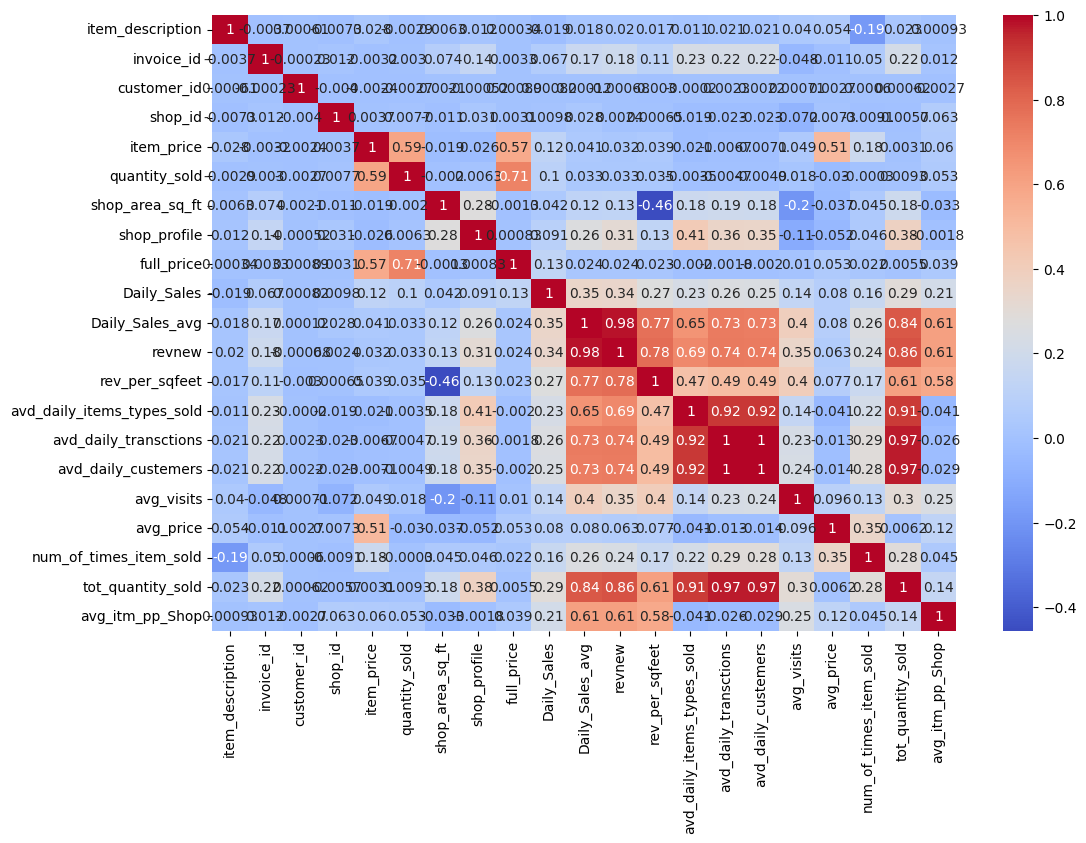

In [45]:
# Create correlation matrix
corr = merged_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [46]:
# Drop highly co related features
cleanedDF = merged_df.drop(['avd_daily_custemers','transaction_date','revnew','item_price','item_description','quantity_sold','full_price','customer_id','avd_daily_transctions'], axis=1)

In [47]:
# # Drop all low MI features
# cleanedDF = cleanedDF.drop(['avd_daily_items_types_sold','num_of_times_item_sold','avg_visits','shop_area_sq_ft','invoice_id','avg_itm_pp_Shop'], axis=1)


In [48]:
# drop duplicates
cleanedDF.drop_duplicates(inplace=True)

In [49]:
cleanedDF

,invoice_id,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,147,8,678,2,65375,37040.173913,179,16,127,220.0,7,438,276
1,54,8,678,2,27435,37040.173913,179,16,127,220.0,7,438,276
2,2000071,8,678,2,27435,37040.173913,179,16,127,220.0,7,438,276
3,3000280,8,678,2,8530,37040.173913,179,16,127,220.0,7,438,276
4,322,8,678,2,8530,37040.173913,179,16,127,220.0,7,438,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,7023229,72,617,3,17725,41364.617086,3907,22,157,150.0,11,6888,349
394476,1478119,72,617,3,14250,41364.617086,3907,22,157,150.0,11,6888,349
394477,3400566,72,617,3,25505,41364.617086,3907,22,157,150.0,11,6888,349
394478,4286907,72,617,3,30320,41364.617086,3907,22,157,150.0,11,6888,349


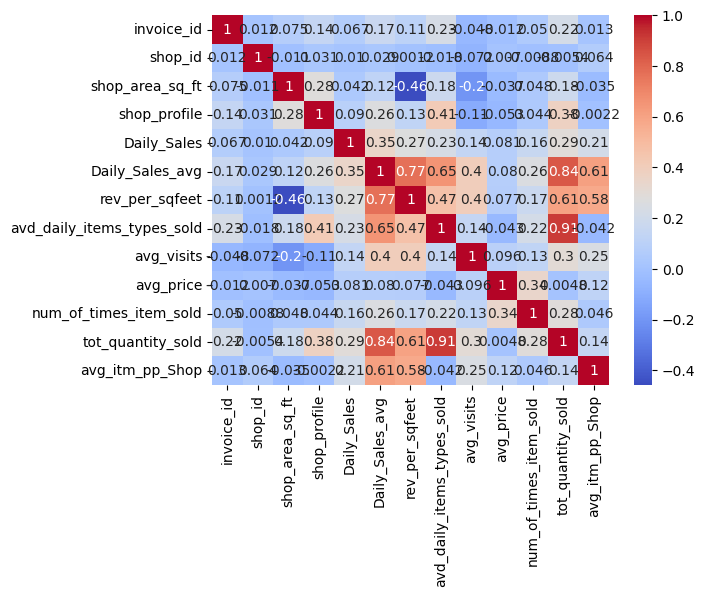

In [50]:
# Create correlation matrix
corr = cleanedDF.corr()

# # Set figure size
# plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

# Micro Data set

In [51]:
merged_df.head(50)

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,...,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,27,2021-12-11,147,57272,8,220,2,678,2,440,...,121225,179,16,32,32,127,220.000000,7,438,276
1,27,2021-12-10,54,97284,8,220,1,678,2,220,...,121225,179,16,32,32,127,220.000000,7,438,276
2,27,2021-12-10,2000071,144334,8,220,1,678,2,220,...,121225,179,16,32,32,127,220.000000,7,438,276
3,27,2021-12-12,3000280,147572,8,220,1,678,2,220,...,121225,179,16,32,32,127,220.000000,7,438,276
4,27,2021-12-12,322,88285,8,220,2,678,2,440,...,121225,179,16,32,32,127,220.000000,7,438,276
5,35,2021-12-13,484,158179,8,160,2,678,2,320,...,121225,179,16,32,32,127,302.222222,21,438,276
6,35,2021-12-11,270,52365,8,160,2,678,2,320,...,121225,179,16,32,32,127,302.222222,21,438,276
7,35,2021-12-11,5000136,26156,8,160,1,678,2,160,...,121225,179,16,32,32,127,302.222222,21,438,276
8,35,2021-12-11,280,152893,8,320,2,678,2,640,...,121225,179,16,32,32,127,302.222222,21,438,276
9,35,2021-12-10,1000077,71176,8,320,2,678,2,640,...,121225,179,16,32,32,127,302.222222,21,438,276


### Make features from avrg item prices for each shoop

In [52]:
# Calculate average price for each item type sold by each shop
avg_price = merged_df.groupby(['shop_id', 'item_description'])['avg_price'].mean().reset_index()
# Rename 'price' column to 'avg_price'
avg_price = avg_price.rename(columns={'avg_price': 'avg_price'})


In [53]:
avg_price

,shop_id,item_description,avg_price
0,1,0,117.500000
1,1,1,92.421875
2,1,3,291.789474
3,1,4,150.000000
4,1,5,115.217391
...,...,...,...
4293,127,32,170.860215
4294,127,33,278.750000
4295,127,34,131.250000
4296,127,35,571.460674


In [54]:
# pivot the dataframe to make item_description values as columns
pivoted_df_pps = avg_price.pivot(index='shop_id', columns='item_description', values='avg_price')

# fill NaN values with 0
pivoted_df_pps.fillna(0, inplace=True)

# resetting the index
pivoted_df_pps = pivoted_df_pps.reset_index()

In [55]:
# rename every column except the first two columns with an incrementing value
for i, col in enumerate(pivoted_df_pps.columns[1:], start=1):
    pivoted_df_pps = pivoted_df_pps.rename(columns={col: f'itm_{i}_pp_Shop'})

In [56]:
pivoted_df_pps.head(10)

item_description,shop_id,itm_1_pp_Shop,itm_2_pp_Shop,itm_3_pp_Shop,itm_4_pp_Shop,itm_5_pp_Shop,itm_6_pp_Shop,itm_7_pp_Shop,itm_8_pp_Shop,itm_9_pp_Shop,...,itm_28_pp_Shop,itm_29_pp_Shop,itm_30_pp_Shop,itm_31_pp_Shop,itm_32_pp_Shop,itm_33_pp_Shop,itm_34_pp_Shop,itm_35_pp_Shop,itm_36_pp_Shop,itm_37_pp_Shop
0,1,117.500000,92.421875,0.0,291.789474,150.000000,115.217391,178.846154,230.909091,301.250000,...,266.725664,240.625000,195.000000,106.250000,123.275862,93.661972,319.210526,109.642857,319.444444,332.307692
1,2,101.718750,90.416667,0.0,365.040323,161.250000,123.684211,194.505495,227.333333,323.500000,...,289.702970,265.294118,207.692308,106.976744,173.593750,104.247312,275.268293,116.666667,269.527027,360.000000
2,3,104.000000,55.398773,0.0,330.683230,218.750000,123.129252,192.187500,200.869565,313.064516,...,269.500000,247.076923,150.000000,129.629630,175.576923,93.669065,264.621849,112.000000,243.030303,295.714286
3,4,85.365854,58.782051,0.0,318.043478,168.181818,133.333333,180.555556,243.913043,306.551724,...,286.835443,237.741935,177.272727,133.333333,129.206349,99.545455,210.693069,141.842105,274.303797,294.545455
4,5,102.741935,58.333333,0.0,259.520958,159.375000,107.299270,171.875000,235.714286,338.730159,...,243.076923,254.736842,168.750000,111.428571,131.639344,84.000000,236.033058,131.428571,338.333333,436.153846
5,6,85.098039,69.045455,0.0,293.743017,150.000000,117.857143,179.411765,276.000000,331.176471,...,267.948718,242.647059,150.000000,141.379310,138.875000,105.813953,295.044248,132.391304,224.929577,391.034483
6,7,88.148148,93.981481,0.0,376.792873,153.061224,119.014085,196.460177,222.777778,289.166667,...,283.786982,271.333333,150.000000,119.148936,137.017544,100.074074,200.312500,123.529412,312.560976,270.000000
7,8,396.666667,134.166667,102.5,308.000000,150.000000,100.000000,214.285714,0.000000,435.000000,...,220.000000,220.000000,0.000000,150.000000,125.714286,93.333333,280.000000,122.500000,302.222222,0.000000
8,9,97.777778,52.415459,0.0,268.320413,162.162162,117.857143,186.486486,210.000000,326.458333,...,271.049724,250.841121,166.666667,100.000000,134.146341,84.218750,208.987342,140.000000,204.383562,294.545455
9,10,106.707317,62.553191,0.0,260.571429,159.677419,114.583333,161.718750,238.307692,340.434783,...,256.991150,225.866667,150.000000,106.818182,161.071429,96.333333,219.939024,148.333333,253.643411,304.838710


### create features Num of times each item sold by each shop

In [57]:
# Calculate average price for each item type sold by each shop
num_of_times_item_sold = merged_df.groupby(['shop_id', 'item_description'])['num_of_times_item_sold'].mean().reset_index()
# Rename 'price' column to 'num_of_times_item_sold'
num_of_times_item_sold = num_of_times_item_sold.rename(columns={'num_of_times_item_sold': 'num_of_times_item_sold'})


In [58]:
# pivot the dataframe to make item_description values as columns
pivoted_df_itc = num_of_times_item_sold.pivot(index='shop_id', columns='item_description', values='num_of_times_item_sold')

# fill NaN values with 0
pivoted_df_itc.fillna(0, inplace=True)

# resetting the index
pivoted_df_itc = pivoted_df_itc.reset_index()

In [59]:
# rename every column except the first two columns with an incrementing value
for i, col in enumerate(pivoted_df_itc.columns[1:], start=1):
    pivoted_df_itc = pivoted_df_itc.rename(columns={col: f'itm_{i}_countP_Shop'})

In [60]:
pivoted_df_itc.head(10)

item_description,shop_id,itm_1_countP_Shop,itm_2_countP_Shop,itm_3_countP_Shop,itm_4_countP_Shop,itm_5_countP_Shop,itm_6_countP_Shop,itm_7_countP_Shop,itm_8_countP_Shop,itm_9_countP_Shop,...,itm_28_countP_Shop,itm_29_countP_Shop,itm_30_countP_Shop,itm_31_countP_Shop,itm_32_countP_Shop,itm_33_countP_Shop,itm_34_countP_Shop,itm_35_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,1,63.0,201.0,0.0,355.0,26.0,79.0,90.0,24.0,33.0,...,199.0,53.0,20.0,27.0,99.0,135.0,97.0,26.0,130.0,21.0
1,2,121.0,380.0,0.0,1094.0,64.0,404.0,167.0,91.0,66.0,...,385.0,182.0,25.0,64.0,272.0,366.0,453.0,53.0,330.0,53.0
2,3,136.0,356.0,0.0,634.0,99.0,260.0,218.0,41.0,102.0,...,279.0,103.0,10.0,48.0,224.0,279.0,271.0,75.0,279.0,33.0
3,4,74.0,169.0,0.0,550.0,59.0,191.0,96.0,49.0,46.0,...,300.0,97.0,19.0,63.0,230.0,290.0,179.0,95.0,184.0,49.0
4,5,119.0,217.0,0.0,562.0,48.0,225.0,160.0,67.0,111.0,...,222.0,128.0,15.0,50.0,217.0,184.0,242.0,122.0,227.0,56.0
5,6,85.0,276.0,0.0,662.0,61.0,199.0,176.0,68.0,80.0,...,278.0,111.0,25.0,57.0,148.0,179.0,268.0,117.0,137.0,58.0
6,7,97.0,179.0,0.0,1020.0,82.0,246.0,215.0,65.0,35.0,...,312.0,107.0,52.0,81.0,107.0,257.0,175.0,36.0,208.0,28.0
7,8,18.0,25.0,4.0,43.0,7.0,21.0,31.0,0.0,7.0,...,7.0,5.0,0.0,4.0,14.0,20.0,8.0,8.0,21.0,0.0
8,9,123.0,427.0,0.0,672.0,61.0,245.0,203.0,56.0,73.0,...,330.0,173.0,16.0,109.0,145.0,219.0,144.0,53.0,135.0,51.0
9,10,168.0,212.0,0.0,666.0,48.0,243.0,105.0,128.0,78.0,...,394.0,115.0,8.0,68.0,277.0,395.0,309.0,112.0,261.0,49.0


### rest

In [61]:
cleanedDF

,invoice_id,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,147,8,678,2,65375,37040.173913,179,16,127,220.0,7,438,276
1,54,8,678,2,27435,37040.173913,179,16,127,220.0,7,438,276
2,2000071,8,678,2,27435,37040.173913,179,16,127,220.0,7,438,276
3,3000280,8,678,2,8530,37040.173913,179,16,127,220.0,7,438,276
4,322,8,678,2,8530,37040.173913,179,16,127,220.0,7,438,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,7023229,72,617,3,17725,41364.617086,3907,22,157,150.0,11,6888,349
394476,1478119,72,617,3,14250,41364.617086,3907,22,157,150.0,11,6888,349
394477,3400566,72,617,3,25505,41364.617086,3907,22,157,150.0,11,6888,349
394478,4286907,72,617,3,30320,41364.617086,3907,22,157,150.0,11,6888,349


In [62]:
# create a new smaller dataframe by grouping all the rows by shop_id and taking the mean of each column exept shop profile column to the corresponding shop id column
microDF=cleanedDF.groupby('shop_id').mean().reset_index().drop(['shop_profile','invoice_id','Daily_Sales'], axis=1)

In [63]:
profiles=cleanedDF[['shop_id','shop_profile']].drop_duplicates().sort_values(by=['shop_id']).reset_index().drop(['index'], axis=1)

In [64]:
profiles

,shop_id,shop_profile
0,1,1
1,2,0
2,3,3
3,4,1
4,5,1
...,...,...
119,123,2
120,124,3
121,125,3
122,126,2


In [65]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop
0,1,580.0,19624.777051,1729.0,14.0,166.0,226.510271,216.273620,3229.0,310.0
1,2,637.0,51150.466469,4153.0,20.0,170.0,244.660896,556.100849,7993.0,330.0
2,3,810.0,32080.320166,2059.0,19.0,162.0,221.642485,322.160555,5945.0,280.0
3,4,516.0,27385.164966,2753.0,19.0,181.0,218.071279,358.786961,5521.0,257.0
4,5,617.0,29554.439489,2610.0,20.0,171.0,215.048847,346.087834,5994.0,268.0
...,...,...,...,...,...,...,...,...,...,...
119,123,735.0,15805.588585,1123.0,14.0,163.0,213.268222,180.355775,3075.0,268.0
120,124,606.0,44868.428805,4205.0,22.0,174.0,222.914553,330.705194,7379.0,345.0
121,125,1028.0,19419.339888,940.0,13.0,183.0,219.776200,158.727947,3255.0,296.0
122,126,328.0,29741.977432,4949.0,18.0,170.0,213.230777,262.533612,5454.0,297.0


In [66]:
microDF=(pd.merge(microDF, profiles, on='shop_id', how='left')).round(0).astype(int)

In [67]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,shop_profile
0,1,580,19625,1729,14,166,227,216,3229,310,1
1,2,637,51150,4153,20,170,245,556,7993,330,0
2,3,810,32080,2059,19,162,222,322,5945,280,3
3,4,516,27385,2753,19,181,218,359,5521,257,1
4,5,617,29554,2610,20,171,215,346,5994,268,1
...,...,...,...,...,...,...,...,...,...,...,...
119,123,735,15806,1123,14,163,213,180,3075,268,2
120,124,606,44868,4205,22,174,223,331,7379,345,3
121,125,1028,19419,940,13,183,220,159,3255,296,3
122,126,328,29742,4949,18,170,213,263,5454,297,2


In [68]:
# microDF=(pd.merge(microDF, pivoted_df_pps, on='shop_id', how='left')).round(0).astype(int)

In [69]:
microDF=(pd.merge(microDF, pivoted_df_itc, on='shop_id', how='left')).round(0).astype(int)

In [70]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,avg_itm_pp_Shop,...,itm_28_countP_Shop,itm_29_countP_Shop,itm_30_countP_Shop,itm_31_countP_Shop,itm_32_countP_Shop,itm_33_countP_Shop,itm_34_countP_Shop,itm_35_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,1,580,19625,1729,14,166,227,216,3229,310,...,199,53,20,27,99,135,97,26,130,21
1,2,637,51150,4153,20,170,245,556,7993,330,...,385,182,25,64,272,366,453,53,330,53
2,3,810,32080,2059,19,162,222,322,5945,280,...,279,103,10,48,224,279,271,75,279,33
3,4,516,27385,2753,19,181,218,359,5521,257,...,300,97,19,63,230,290,179,95,184,49
4,5,617,29554,2610,20,171,215,346,5994,268,...,222,128,15,50,217,184,242,122,227,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,735,15806,1123,14,163,213,180,3075,268,...,145,67,12,33,113,124,94,93,102,36
120,124,606,44868,4205,22,174,223,331,7379,345,...,254,118,15,61,239,412,350,260,393,85
121,125,1028,19419,940,13,183,220,159,3255,296,...,56,15,23,40,198,337,235,7,274,25
122,126,328,29742,4949,18,170,213,263,5454,297,...,287,59,0,62,302,442,216,160,407,43


### Cleanup microDF

In [71]:

# # drop the columns withlow MI scores
# microDF=microDF.drop(['itm_15_countP_Shop','itm_35_countP_Shop','itm_4_countP_Shop','itm_32_countP_Shop','itm_3_countP_Shop','itm_30_countP_Shop',
#                       'itm_26_countP_Shop','avg_itm_pp_Shop','itm_12_countP_Shop','itm_10_countP_Shop','itm_6_countP_Shop','itm_34_countP_Shop','itm_26_countP_Shop','itm_20_countP_Shop',
#                       'itm_8_countP_Shop','itm_31_countP_Shop','itm_21_countP_Shop','itm_14_countP_Shop','itm_24_countP_Shop','itm_16_countP_Shop','itm_28_countP_Shop',
#                       'itm_36_countP_Shop','avd_daily_items_types_sold'], axis=1)


# drop the columns withlow MI scores
microDF=microDF.drop(['itm_15_countP_Shop','itm_35_countP_Shop','itm_4_countP_Shop','itm_32_countP_Shop','itm_3_countP_Shop','itm_30_countP_Shop',
                      'itm_26_countP_Shop','avg_itm_pp_Shop','itm_12_countP_Shop','itm_10_countP_Shop','itm_6_countP_Shop','itm_34_countP_Shop','itm_26_countP_Shop'], axis=1)

In [72]:
microDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,shop_profile,...,itm_23_countP_Shop,itm_24_countP_Shop,itm_25_countP_Shop,itm_27_countP_Shop,itm_28_countP_Shop,itm_29_countP_Shop,itm_31_countP_Shop,itm_33_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,1,580,19625,1729,14,166,227,216,3229,1,...,56,0,194,13,199,53,27,135,130,21
1,2,637,51150,4153,20,170,245,556,7993,0,...,100,0,725,67,385,182,64,366,330,53
2,3,810,32080,2059,19,162,222,322,5945,3,...,102,0,329,30,279,103,48,279,279,33
3,4,516,27385,2753,19,181,218,359,5521,1,...,52,0,237,43,300,97,63,290,184,49
4,5,617,29554,2610,20,171,215,346,5994,1,...,103,0,476,35,222,128,50,184,227,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,123,735,15806,1123,14,163,213,180,3075,2,...,40,0,149,27,145,67,33,124,102,36
120,124,606,44868,4205,22,174,223,331,7379,3,...,150,0,226,78,254,118,61,412,393,85
121,125,1028,19419,940,13,183,220,159,3255,3,...,81,3,44,37,56,15,40,337,274,25
122,126,328,29742,4949,18,170,213,263,5454,2,...,71,0,174,56,287,59,62,442,407,43


## Split To Test and Train Data

In [73]:
# Split the DataFrame into two based on column B
Eval_mic_DF = microDF[microDF['shop_profile'] == 0].drop(['shop_profile'], axis=1).reset_index().drop(['index'], axis=1)
Train_mic_DF = microDF[microDF['shop_profile'] != 0].reset_index().drop(['index'], axis=1)

In [74]:
Train_mic_DF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,shop_profile,...,itm_23_countP_Shop,itm_24_countP_Shop,itm_25_countP_Shop,itm_27_countP_Shop,itm_28_countP_Shop,itm_29_countP_Shop,itm_31_countP_Shop,itm_33_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,1,580,19625,1729,14,166,227,216,3229,1,...,56,0,194,13,199,53,27,135,130,21
1,3,810,32080,2059,19,162,222,322,5945,3,...,102,0,329,30,279,103,48,279,279,33
2,4,516,27385,2753,19,181,218,359,5521,1,...,52,0,237,43,300,97,63,290,184,49
3,5,617,29554,2610,20,171,215,346,5994,1,...,103,0,476,35,222,128,50,184,227,56
4,6,676,28440,2286,19,167,216,398,5692,1,...,66,0,298,36,278,111,57,179,137,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,123,735,15806,1123,14,163,213,180,3075,2,...,40,0,149,27,145,67,33,124,102,36
96,124,606,44868,4205,22,174,223,331,7379,3,...,150,0,226,78,254,118,61,412,393,85
97,125,1028,19419,940,13,183,220,159,3255,3,...,81,3,44,37,56,15,40,337,274,25
98,126,328,29742,4949,18,170,213,263,5454,2,...,71,0,174,56,287,59,62,442,407,43


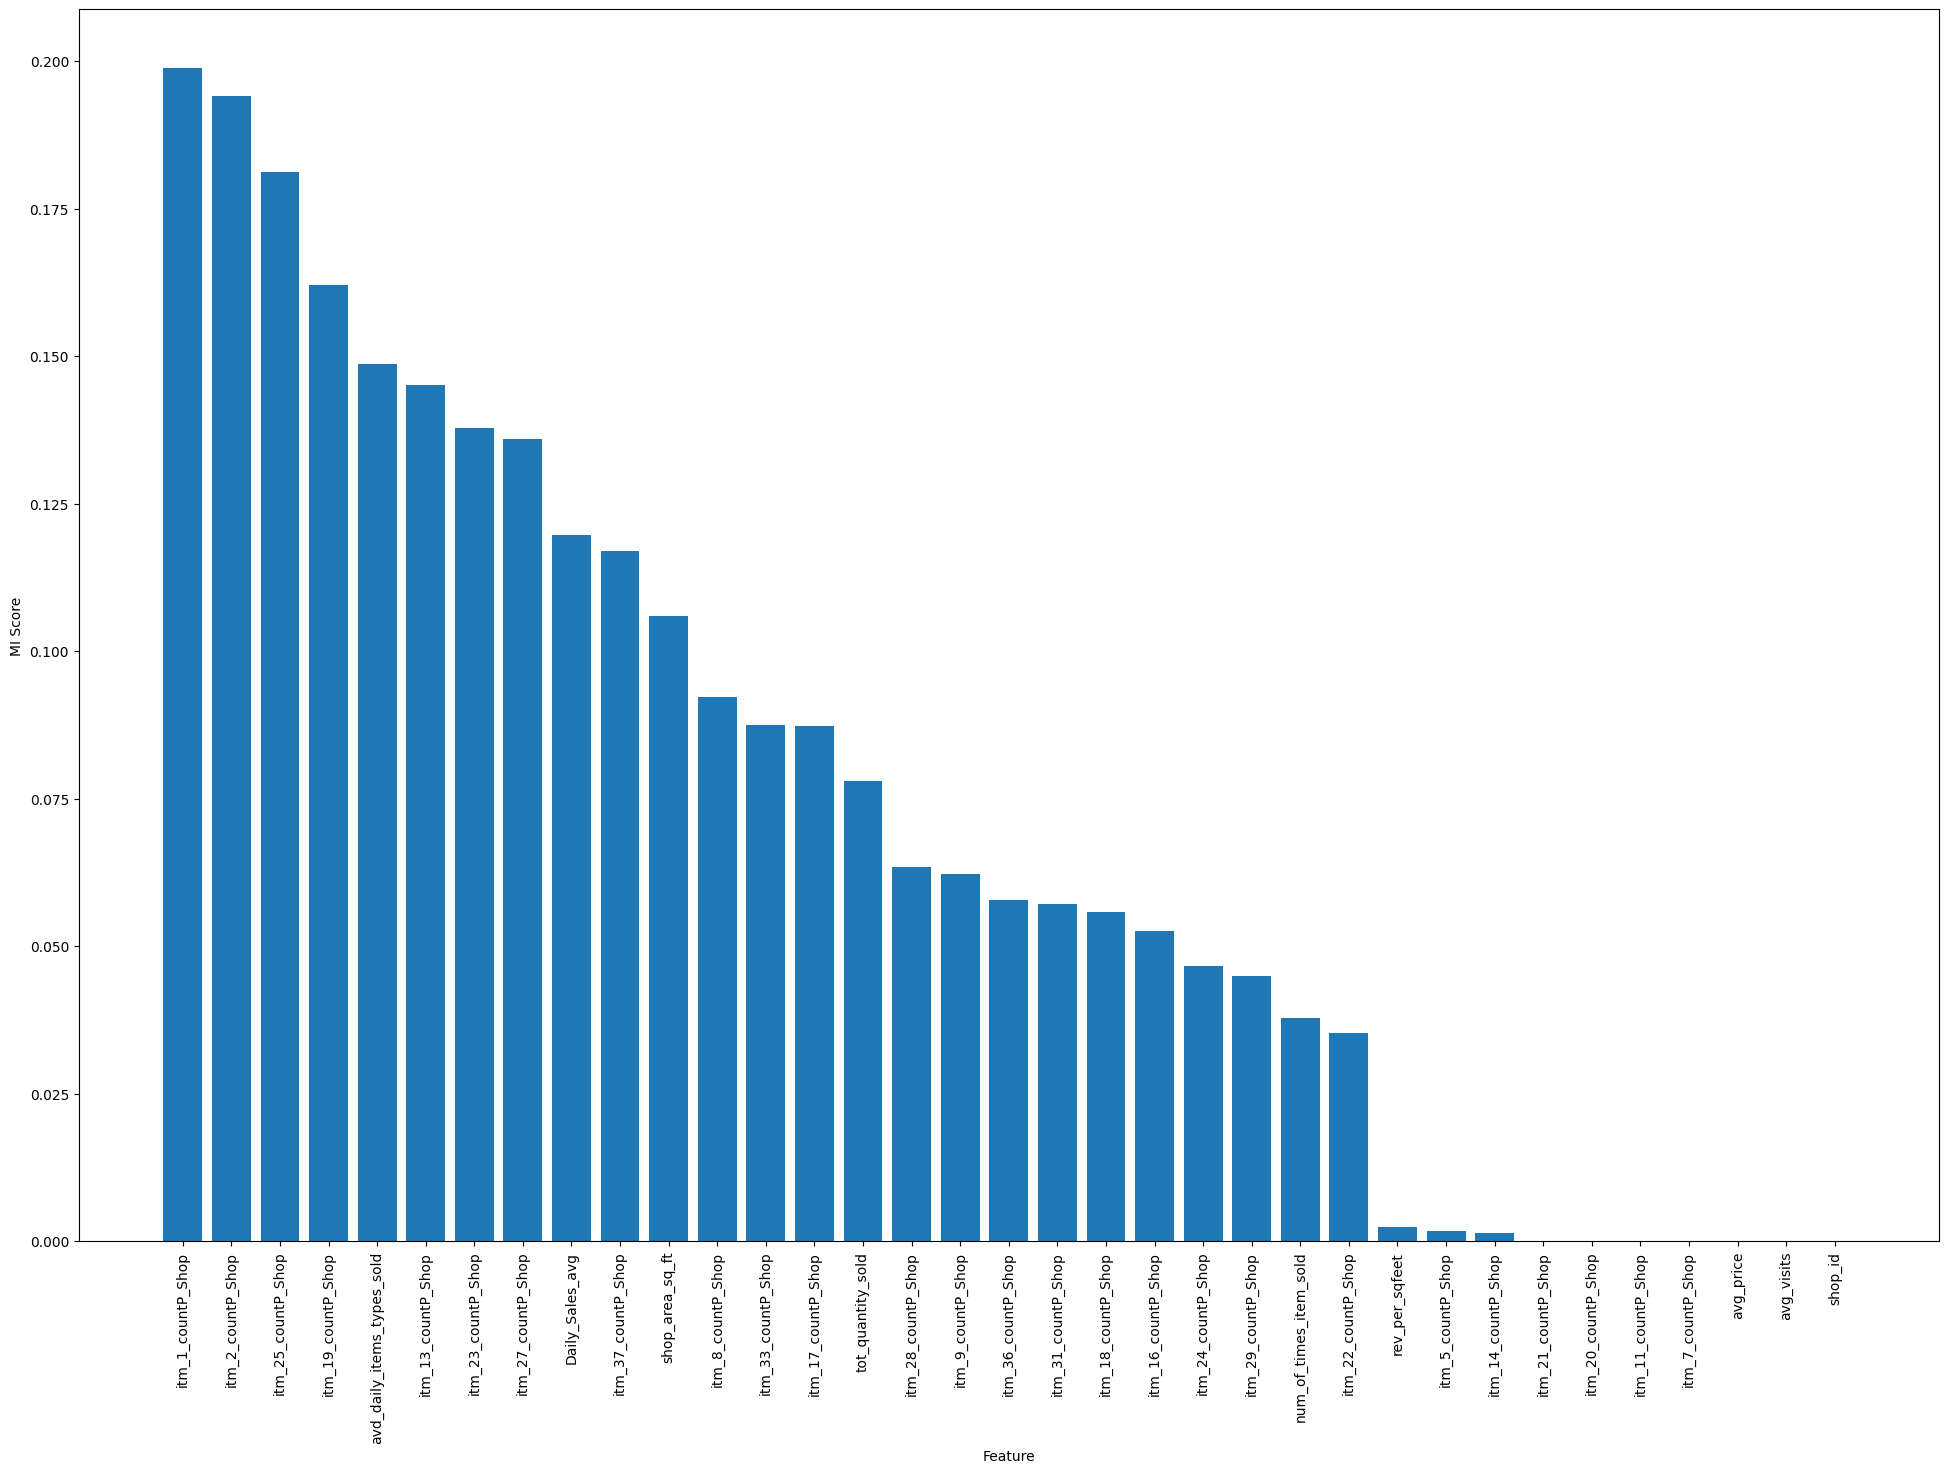

In [75]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Separate the target variable
X = Train_mic_DF.drop(['shop_profile'], axis=1)
y = Train_mic_DF['shop_profile']

# Compute MI scores
mi_scores = mutual_info_classif(X, y)

# Convert to DataFrame and sort by MI score
mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# Plot bar chart of MI scores
plt.figure(figsize=(24,16))
plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('MI Score')
plt.show()

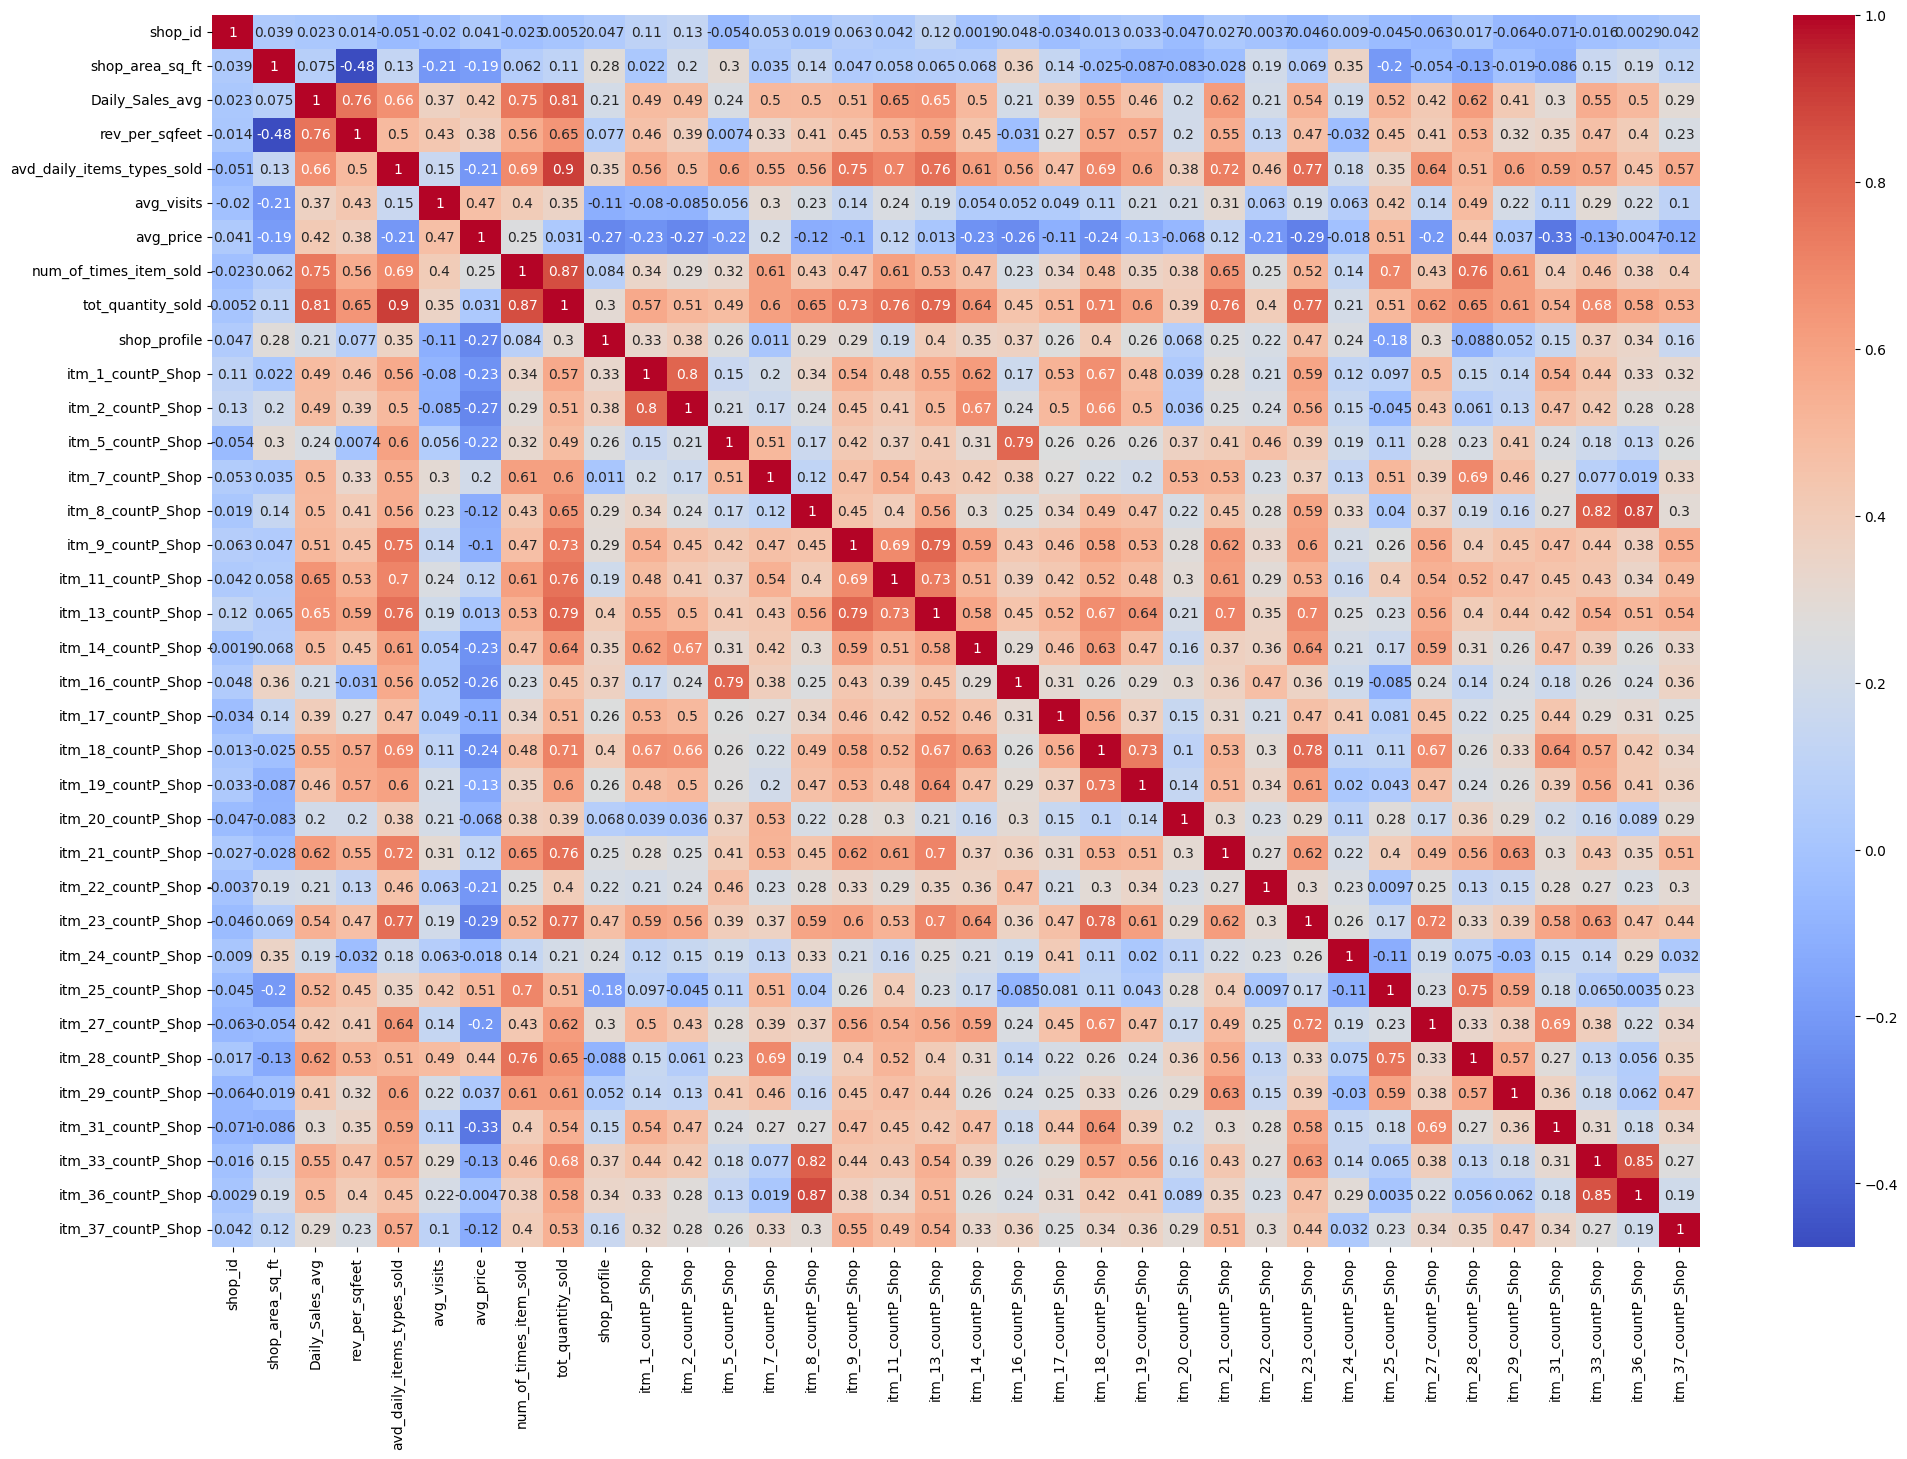

In [76]:
# Create correlation matrix
corr = microDF.corr()

# Set figure size
plt.figure(figsize=(24, 16))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [77]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

train_data_mic, test_data_mic = train_test_split(Train_mic_DF, test_size=0.2)

In [78]:
test_data_mic=test_data_mic.reset_index(drop=True)
train_data_mic=train_data_mic.reset_index(drop=True)

In [79]:
# remove store id from the training and testing sets

test_data_mic_noID = test_data_mic.drop(['shop_id'], axis=1)
train_data_mic_noID = train_data_mic.drop(['shop_id'], axis=1)

In [80]:
# Split data into training and test sets
X_train=train_data_mic_noID.drop('shop_profile', axis=1)
y_train=train_data_mic_noID['shop_profile']
X_test=test_data_mic_noID.drop('shop_profile', axis=1)
y_test=test_data_mic_noID['shop_profile']

In [81]:
X_test

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,itm_1_countP_Shop,itm_2_countP_Shop,...,itm_23_countP_Shop,itm_24_countP_Shop,itm_25_countP_Shop,itm_27_countP_Shop,itm_28_countP_Shop,itm_29_countP_Shop,itm_31_countP_Shop,itm_33_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,691,42359,3167,23,168,218,430,7976,160,464,...,135,7,308,67,445,87,70,176,224,63
1,617,29696,2530,21,166,203,388,6554,168,212,...,112,0,312,59,394,115,68,395,261,49
2,676,30764,2375,21,166,204,388,6507,123,427,...,108,0,336,79,330,173,109,219,135,51
3,606,44868,4205,22,174,223,331,7379,210,553,...,150,0,226,78,254,118,61,412,393,85
4,594,23895,2265,19,169,201,308,5475,162,312,...,51,0,191,21,160,90,43,331,290,63
5,351,32015,5058,19,177,223,373,6355,120,283,...,123,0,280,71,378,93,66,466,482,27
6,668,21033,1625,16,166,215,210,3871,53,236,...,45,0,139,29,99,78,36,178,145,29
7,336,15762,2614,15,168,196,202,3563,116,100,...,74,0,149,52,164,79,83,77,102,40
8,1077,61354,3182,22,175,222,637,10311,147,384,...,122,9,248,45,281,81,60,946,1540,33
9,676,24740,2022,19,182,214,261,4993,105,253,...,63,0,357,59,309,94,70,278,221,48


In [82]:
X_train

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,itm_1_countP_Shop,itm_2_countP_Shop,...,itm_23_countP_Shop,itm_24_countP_Shop,itm_25_countP_Shop,itm_27_countP_Shop,itm_28_countP_Shop,itm_29_countP_Shop,itm_31_countP_Shop,itm_33_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,565,29124,2696,20,171,221,314,5789,139,255,...,100,0,225,41,329,90,52,172,219,73
1,706,33410,2240,15,177,260,333,4446,53,69,...,62,0,221,18,314,41,28,120,216,43
2,1021,34693,1767,19,174,225,254,5142,76,446,...,69,0,122,38,172,62,42,326,352,54
3,676,40161,3215,22,170,223,431,7751,230,400,...,103,0,548,76,259,123,77,356,406,62
4,328,29742,4949,18,170,213,263,5454,140,297,...,71,0,174,56,287,59,62,442,407,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,735,23643,1835,19,167,202,258,5073,177,508,...,93,0,157,74,235,66,98,332,168,56
76,520,40278,3821,20,173,229,442,6696,142,413,...,58,0,616,44,447,117,47,231,143,48
77,470,43278,4583,17,184,270,429,5837,157,219,...,60,0,687,45,376,114,34,244,405,52
78,676,36624,2994,20,163,222,395,6315,196,465,...,95,0,307,43,283,150,69,251,151,68


#### Decition tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris



# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dtc, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score:  0.5625


In [84]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Train the Decision Trees model
dt_model = DecisionTreeClassifier() # criterion= 'gini', max_depth= 3, min_samples_leaf= 3, min_samples_split= 5)
dt_model.fit(X_train, y_train)

# Test the model on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 65.00%


In [85]:
from sklearn.metrics import f1_score

# calculate the F1 score for each class
f1_class2 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[1], average='weighted')
f1_class0 = f1_score(y_test, y_pred, labels=[0], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

formatted_f1_average = "{:.4f}".format(f1_average)

F1 score for class 0: 0.00
F1 score for class 1: 0.71
F1 score for class 2: 0.40
Average F1 score: 0.37


c:\Users\gw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


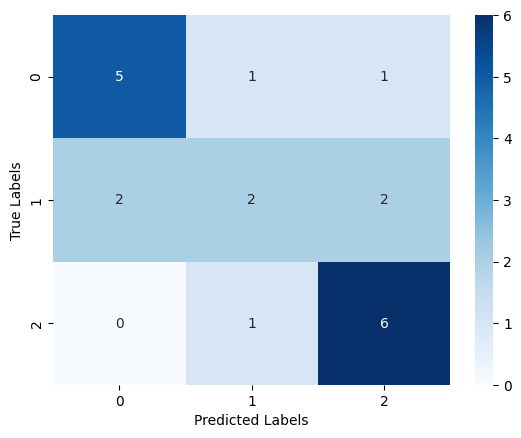

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Big Tune

In [87]:
# train_data_mic_noID['shop_profile'] = train_data_mic_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_mic_noID['shop_profile'] = test_data_mic_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_mic['shop_profile'] = test_data_mic['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# train_data_mic['shop_profile'] = train_data_mic['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [155]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Split data into training and test sets
X_train = train_data_mic_noID.drop('shop_profile', axis=1)
y_train = train_data_mic_noID['shop_profile']
X_test = test_data_mic_noID.drop('shop_profile', axis=1)
y_test = test_data_mic_noID['shop_profile']

# Define the models to be hyperparameter tuned
models = [
    # {
    #     'name': 'Decision Tree',
    #     'model': DecisionTreeClassifier(),
    #     'params': {
    #         'criterion': ['gini', 'entropy'],
    #         'splitter': ['best', 'random'],
    #         'max_depth': [3, 5, 7, None],
    #         'min_samples_split': [2, 5, 10],
    #         'min_samples_leaf': [1, 2, 4],
    #         'max_features': ['sqrt', 'log2', None]
    #     }
    # },
    # {
    #     'name': 'Naive Bayes',
    #     'model': GaussianNB(),
    #     'params': {
    #         'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    #     }
    # },
    # {
    #     'name': 'Support Vector Machine',
    #     'model': SVC(),
    #     'params': {
    #         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #         'C': [0.1, 1.0, 10.0],
    #         'gamma': ['scale', 'auto']
    #     }
    # },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    # {
    #     'name': 'Logistic Regression',
    #     'model': LogisticRegression(),
    #     'params': {
    #         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #         'C': [0.1, 1.0, 10.0],
    #         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #         'max_iter': [100, 500, 1000]
    # }
    # },
    # {
    #     'name': 'K-Nearest Neighbors',
    #     'model': KNeighborsClassifier(),
    #     'params': {
    #         'n_neighbors': [3, 5, 7],
    #         'weights': ['uniform', 'distance'],
    #         'metric': ['euclidean', 'manhattan', 'minkowski']
    # }
    # }

]

# Perform hyperparameter tuning for each model using GridSearchCV
best_model = None
best_score = 0.0
for model_config in models:
    print(f'Tuning {model_config["name"]}...')
    model = model_config['model']
    params = model_config['params']
    custom_grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5,
        n_jobs=-1
    )
    custom_grid_search.fit(X_train, y_train)
    score = custom_grid_search.best_score_
    print(f'Best score for {model_config["name"]}: {score:.4f}')
    print(f'Best Parametersfor {model_config["name"]}:  {custom_grid_search.best_params_}')
    
    # get the best random forrest params
    if model_config['name'] == 'Random Forest':
        best_params_RT = custom_grid_search.best_params_
        best_model_RT= custom_grid_search.best_estimator_   
        
    if score > best_score:
        best_score = score
        best_model = custom_grid_search.best_estimator_
        best_model_name = model_config['name']
        best_model_hyperparams = custom_grid_search.best_params_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy score for the best model: {accuracy:.4f}')
   


Tuning Decision Tree...
Best score for Decision Tree: 0.6250
Best Parametersfor Decision Tree:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Tuning Naive Bayes...
Best score for Naive Bayes: 0.5750
Best Parametersfor Naive Bayes:  {'var_smoothing': 1e-09}
Tuning Support Vector Machine...
Best score for Support Vector Machine: 0.5000
Best Parametersfor Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Tuning Random Forest...
Best score for Random Forest: 0.6250
Best Parametersfor Random Forest:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuning K-Nearest Neighbors...
Best score for K-Nearest Neighbors: 0.5250
Best Parametersfor K-Nearest Neighbors:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test accuracy score for the best model: 0.4500


In [156]:
# train_data_mic_noID['shop_profile'] = train_data_mic_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_mic_noID['shop_profile'] = test_data_mic_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_mic['shop_profile'] = test_data_mic['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# train_data_mic['shop_profile'] = train_data_mic['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# y_pred['shop_profile'] = y_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [157]:
# Deleted some features

# Tuning Decision Tree...
# Best score for Decision Tree: 0.6625
# Best Parametersfor Decision Tree:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
# Tuning Naive Bayes...
# Best score for Naive Bayes: 0.5500
# Best Parametersfor Naive Bayes:  {'var_smoothing': 1e-05}
# Tuning Support Vector Machine...
# Best score for Support Vector Machine: 0.5500
# Best Parametersfor Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
# Tuning Random Forest...
# Best score for Random Forest: 0.6375
# Best Parametersfor Random Forest:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
# Test accuracy score for the best model: 0.5000

In [158]:
X_train

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,itm_1_countP_Shop,itm_2_countP_Shop,...,itm_23_countP_Shop,itm_24_countP_Shop,itm_25_countP_Shop,itm_27_countP_Shop,itm_28_countP_Shop,itm_29_countP_Shop,itm_31_countP_Shop,itm_33_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,565,29124,2696,20,171,221,314,5789,139,255,...,100,0,225,41,329,90,52,172,219,73
1,706,33410,2240,15,177,260,333,4446,53,69,...,62,0,221,18,314,41,28,120,216,43
2,1021,34693,1767,19,174,225,254,5142,76,446,...,69,0,122,38,172,62,42,326,352,54
3,676,40161,3215,22,170,223,431,7751,230,400,...,103,0,548,76,259,123,77,356,406,62
4,328,29742,4949,18,170,213,263,5454,140,297,...,71,0,174,56,287,59,62,442,407,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,735,23643,1835,19,167,202,258,5073,177,508,...,93,0,157,74,235,66,98,332,168,56
76,520,40278,3821,20,173,229,442,6696,142,413,...,58,0,616,44,447,117,47,231,143,48
77,470,43278,4583,17,184,270,429,5837,157,219,...,60,0,687,45,376,114,34,244,405,52
78,676,36624,2994,20,163,222,395,6315,196,465,...,95,0,307,43,283,150,69,251,151,68


In [159]:
X_test

,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,itm_1_countP_Shop,itm_2_countP_Shop,...,itm_23_countP_Shop,itm_24_countP_Shop,itm_25_countP_Shop,itm_27_countP_Shop,itm_28_countP_Shop,itm_29_countP_Shop,itm_31_countP_Shop,itm_33_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,691,42359,3167,23,168,218,430,7976,160,464,...,135,7,308,67,445,87,70,176,224,63
1,617,29696,2530,21,166,203,388,6554,168,212,...,112,0,312,59,394,115,68,395,261,49
2,676,30764,2375,21,166,204,388,6507,123,427,...,108,0,336,79,330,173,109,219,135,51
3,606,44868,4205,22,174,223,331,7379,210,553,...,150,0,226,78,254,118,61,412,393,85
4,594,23895,2265,19,169,201,308,5475,162,312,...,51,0,191,21,160,90,43,331,290,63
5,351,32015,5058,19,177,223,373,6355,120,283,...,123,0,280,71,378,93,66,466,482,27
6,668,21033,1625,16,166,215,210,3871,53,236,...,45,0,139,29,99,78,36,178,145,29
7,336,15762,2614,15,168,196,202,3563,116,100,...,74,0,149,52,164,79,83,77,102,40
8,1077,61354,3182,22,175,222,637,10311,147,384,...,122,9,248,45,281,81,60,946,1540,33
9,676,24740,2022,19,182,214,261,4993,105,253,...,63,0,357,59,309,94,70,278,221,48


In [160]:
Eval_mic_DF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits,avg_price,num_of_times_item_sold,tot_quantity_sold,itm_1_countP_Shop,...,itm_23_countP_Shop,itm_24_countP_Shop,itm_25_countP_Shop,itm_27_countP_Shop,itm_28_countP_Shop,itm_29_countP_Shop,itm_31_countP_Shop,itm_33_countP_Shop,itm_36_countP_Shop,itm_37_countP_Shop
0,2,637,51150,4153,20,170,245,556,7993,121,...,100,0,725,67,385,182,64,366,330,53
1,19,411,42030,5047,18,180,255,487,6368,97,...,62,0,591,72,602,115,85,179,135,65
2,23,617,38922,3719,20,167,240,428,6482,111,...,22,0,389,36,430,106,67,229,213,38
3,24,676,21074,1751,17,160,210,253,4463,224,...,29,0,328,34,217,128,47,116,128,35
4,29,597,32387,2837,19,168,222,346,5994,174,...,75,0,271,77,300,58,63,231,154,76
5,30,530,51396,4875,20,208,252,385,6848,163,...,77,0,522,57,714,106,84,201,249,38
6,38,411,26163,3234,17,166,213,321,5145,172,...,61,0,447,61,279,105,95,163,167,46
7,44,715,22138,1563,15,158,211,264,4200,72,...,47,0,149,41,217,26,36,376,280,30
8,46,545,48683,4572,19,184,235,366,6184,294,...,69,0,456,38,229,145,73,272,302,15
9,50,411,42218,5191,18,208,248,585,6837,104,...,105,0,425,42,565,101,62,245,201,38


In [161]:
Eval_mic_DF_noID=Eval_mic_DF.drop('shop_id', axis=1)

In [162]:
# with all the features

# Tuning Decision Tree...
# Best score for Decision Tree: 0.6500
# Best Parametersfor Decision Tree:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
# Tuning Naive Bayes...
# Best score for Naive Bayes: 0.6375
# Best Parametersfor Naive Bayes:  {'var_smoothing': 1e-05}
# Tuning Support Vector Machine...
# Best score for Support Vector Machine: 0.6125
# Best Parametersfor Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
# Tuning Random Forest...
# Best score for Random Forest: 0.7125
# Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
# Tuning Logistic Regression...
# Best score for Logistic Regression: 0.6625
# Best Parametersfor Logistic Regression:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
# Tuning K-Nearest Neighbors...
# Best score for K-Nearest Neighbors: 0.5500
# Best Parametersfor K-Nearest Neighbors:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
# Test accuracy score for the best model: 0.4500

In [341]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Split data into training and test sets
X_train = train_data_mic_noID.drop('shop_profile', axis=1)
y_train = train_data_mic_noID['shop_profile']
X_test = test_data_mic_noID.drop('shop_profile', axis=1)
y_test = test_data_mic_noID['shop_profile']


# Define the logistic regression model
model_random = RandomForestClassifier(**best_params_RT)
# model_random=best_model_RT

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model_random.predict(X_test)


accu = accuracy_score(y_test, predictions)

print(accu)
# print(f1_score(y_test, predictions, average=None))

0.75


##### use hyper param best model instead

In [342]:
# # use hyper param best model instead

# # Split data into training and test sets
# X_train = train_data_mic_noID.drop('shop_profile', axis=1)
# y_train = train_data_mic_noID['shop_profile']
# X_test = test_data_mic_noID.drop('shop_profile', axis=1)
# y_test = test_data_mic_noID['shop_profile']

# model_random=best_model
# # Train the model on the training data
# model_random.fit(X_train, y_train)



In [343]:
# convert to data frame
predictions_Test_randomforest=model_random.predict(Eval_mic_DF_noID)
predictions_Test_randomforest=pd.DataFrame(predictions_Test_randomforest)

In [344]:
predictions_Test_randomforest

,0
0,1
1,1
2,1
3,1
4,2
5,1
6,1
7,2
8,1
9,1


In [345]:
# concatenate the dataframes
fin_results = pd.concat([Eval_mic_DF['shop_id'], predictions_Test_randomforest], axis=1)

In [346]:
fin_results=fin_results.rename(columns={0: 'shop_profile'})
fin_results=fin_results.rename(columns={'shop_id': 'shop_id_num'})

In [347]:
fin_results['shop_profile'] = fin_results['shop_profile'].replace({3 : 'High', 2:'Moderate', 1 : 'Low'})

In [348]:
fin_results

,shop_id_num,shop_profile
0,2,Low
1,19,Low
2,23,Low
3,24,Low
4,29,Moderate
5,30,Low
6,38,Low
7,44,Moderate
8,46,Low
9,50,Low


In [349]:
test_shop_order=rawTestDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
test_shop_order=test_shop_order.to_frame()
# rename the column 
test_shop_order=test_shop_order.rename(columns={'shop_id': 'shop_id_num'})

C:\Users\gw\AppData\Local\Temp\ipykernel_28396\2622051205.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_shop_order=rawTestDF['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [350]:
#concatanate the row shop_id from rawTestDF
test_shop_order=pd.concat([test_shop_order, rawTestDF['shop_id']], axis=1)

In [351]:
# left join final_result with test_shop_order 

test_shop_order=test_shop_order.merge(fin_results, on='shop_id_num', how='left')

In [352]:
print_result=test_shop_order.drop('shop_id_num', axis=1)

In [353]:
print_result

,shop_id,shop_profile
0,SHOP046,Low
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Moderate
5,SHOP030,Low
6,SHOP038,Low
7,SHOP029,Moderate
8,SHOP096,Low
9,SHOP092,Low


In [406]:
# print_result.to_csv('result_day04_01.csv', index=False)

import pandas as pd
import os

# set the desired file name
file_name = 'result_day04.csv'

# check if the file already exists
if os.path.isfile(file_name):
    # if it exists, add an incrementing number to the file name
    i = 1
    while os.path.isfile(f"{file_name.split('.')[0]}_{i}.csv"):
        i += 1
    file_name = f"{file_name.split('.')[0]}_{i}.csv"

# write the DataFrame to a CSV file
print_result.to_csv(file_name, index=False)


In [355]:
from sklearn.metrics import f1_score
y_pred=predictions
# calculate the F1 score for each class
f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

formatted_f1_average = "{:.4f}".format(f1_average)

F1 score for class 0: 0.75
F1 score for class 1: 0.73
F1 score for class 2: 0.77
Average F1 score: 0.75


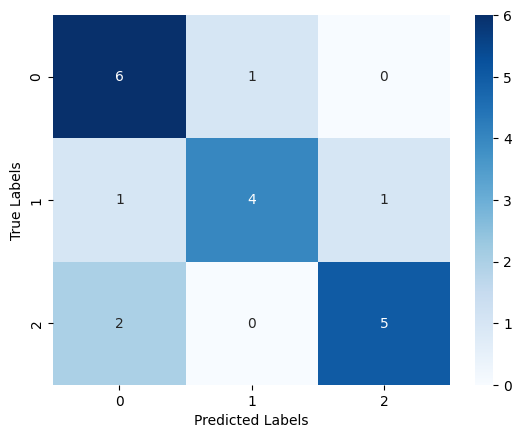

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Huge data Set

## Split To Test and Train Data

In [357]:
# # Split the DataFrame into two based on column B
# TestDF = cleanedDF[cleanedDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
# TrainDF = cleanedDF[cleanedDF['shop_profile'] != 0]

In [358]:
# # reset index
# TestDF=TestDF.reset_index(drop=True)
# TrainDF=TrainDF.reset_index(drop=True)

In [359]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt

# # Separate the target variable
# X = TrainDF.drop(['shop_profile'], axis=1)
# y = TrainDF['shop_profile']

# # Compute MI scores
# mi_scores = mutual_info_classif(X, y)

# # Convert to DataFrame and sort by MI score
# mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
# mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# # Plot bar chart of MI scores
# plt.figure(figsize=(12,8))
# plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('MI Score')
# plt.show()

In [360]:
# from sklearn.decomposition import PCA

# # Create principal components
# pca = PCA()
# PCA_X = pca.fit_transform(X.drop(['shop_id'], axis=1))

# # Convert to dataframe
# component_names = [f"PC{i+1}" for i in range(PCA_X.shape[1])]
# PCA_X = pd.DataFrame(PCA_X, columns=component_names)

# PCA_X = pd.concat([PCA_X, X['shop_id']], axis=1)


In [361]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt

# # Compute MI scores
# mi_scores = mutual_info_classif(PCA_X, y)

# # Convert to DataFrame and sort by MI score
# mi_scores_df = pd.DataFrame({'feature': PCA_X.columns, 'mi_score': mi_scores})
# mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# # Plot bar chart of MI scores
# plt.figure(figsize=(12,8))
# plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('MI Score')
# plt.show()

In [362]:
# X=PCA_X

In [363]:
# cleanedDF

In [364]:
# # Split Fulldata into training and testing sets
# from sklearn.model_selection import train_test_split

# column_name = 'shop_id'
# unique_categories = TrainDF[column_name].nunique()
# categories_in_dataset_1 = int(unique_categories * 0.8)
# categories_in_dataset_2 = unique_categories - categories_in_dataset_1
# dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
# dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

# train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
# test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





# #train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [365]:
# test_data=test_data.reset_index(drop=True)
# train_data=train_data.reset_index(drop=True)

In [366]:
# # remove store id from the training and testing sets

# train_data_noID = train_data.drop(['shop_id'], axis=1)
# test_data_noID = test_data.drop(['shop_id'], axis=1)

## XG boost

In [367]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [368]:

# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Set the parameters for grid search
# params = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01, 0.1, 1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'objective': ['multi:softmax', 'multi:softprob'],
#     'num_class': [3],
#     'tree_method': ['gpu_hist']
# }

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found by grid search
# print(grid_search.best_params_)

# # Train the model using the best hyperparameters found by grid search
# xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# xg_pred = xgb_model.predict(X_test)

# # Evaluate the model's performance on the test set
# accuracy = np.mean(xg_pred == y_test)
# print('Accuracy:', accuracy)



Best hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}

In [369]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']


# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(tree_method='gpu_hist')

# # fit model to training data
# xgb_model.fit(X_train, y_train)

# # make predictions on test data
# xg_pred = xgb_model.predict(X_test)

# # evaluate performance of model
# mse = mean_squared_error(y_test, xg_pred)
# print('MSE:', mse)

MSE: 0.40624200562803786

In [370]:
# xg_pred=pd.DataFrame(xg_pred, columns=['shop_profile'])

# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# xg_pred['shop_profile'] = xg_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [371]:
# predicted_res = pd.concat([test_data['shop_id'], pred['shop_profile']], axis=1)
# expected_res=test_data[['shop_id', 'shop_profile']]

# pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=exp_mode['shop_profile']
# y_pred=pred_mode['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


In [372]:
# xg_pred

In [373]:
# concatenated_df_XG_res = pd.concat([test_data['shop_id'], xg_pred['shop_profile']], axis=1)
# # concatenated_df_XG_res['shop_profile'] = concatenated_df_XG_res['shop_profile'].astype(int)
# # concatenated_df_XG_res['shop_id'] = concatenated_df_XG_res['shop_id'].astype(int)

In [374]:
# concatenated_df_XG_res

In [375]:
# expected_df_XG=test_data[['shop_id', 'shop_profile']]

In [376]:
# expected_df_XG

In [377]:
# # group by 'group' column and calculate mode of 'value' column
# XG_res_mode_df = concatenated_df_XG_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [378]:
# XG_res_mode_df

In [379]:
# group by 'group' column and calculate mode of 'value' column
# XG_exp_mode_df = expected_df_XG.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [380]:
# XG_exp_mode_df

In [381]:
# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=XG_exp_mode_df['shop_profile']
# y_pred=XG_res_mode_df['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


Average F1 score: 0.47

In [382]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Assume y_true and y_pred are the true and predicted labels, respectively
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()


## Random Forrest

In [383]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split


# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Initialize the Random Forest classifier
# rfc = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=25)

# # Train the model on the training data
# rfc.fit(X_train, y_train)

# # Predict on the testing data
# RF_pred = rfc.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, RF_pred)
# print("Accuracy:", accuracy)



Accuracy: 0.6433444188624542

In [384]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import classification_report

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Create the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform a grid search over the parameter grid with cross-validation
# rf_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# rf_cv.fit(X_train, y_train)

# # Print the best parameters found by the grid search
# print("Best Parameters:", rf_cv.best_params_)

# # Predict on the test data using the best model
# RF_pred = rf_cv.predict(X_test)

# # Print the classification report
# print(classification_report(y_test, RF_pred))


In [385]:
# RF_pred = pd.DataFrame(RF_pred, columns=['shop_profile'])

# predicted_res = pd.concat([test_data['shop_id'], RF_pred['shop_profile']], axis=1)
# expected_res=test_data[['shop_id', 'shop_profile']]

# pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=exp_mode['shop_profile']
# y_pred=pred_mode['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


Average F1 score: 0.53

In [386]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Assume y_true and y_pred are the true and predicted labels, respectively
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

In [387]:
# TestDF

In [388]:
# X_test

In [389]:
# Eval_noID=TestDF.drop('shop_id', axis=1)

In [390]:
# Eval_noID

In [391]:
# X_Eval=Eval_noID

# # Predict on the evaluation set
# RF_eval_pred = rfc.predict(X_Eval)

In [392]:
# RF_eval_pred

In [393]:
# RF_eval_pred = pd.DataFrame(RF_eval_pred, columns=['shop_profile'])

# predicted_eval_res = pd.concat([TestDF['shop_id'], RF_eval_pred['shop_profile']], axis=1)


# pred_Eval_mode = predicted_eval_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [394]:
# pred_Eval_mode['shop_profile'] = pred_Eval_mode['shop_profile'].replace({1:'High', 2:'Moderate', 3:'Low'})

In [395]:
# pred_Eval_mode

## Big Tune

In [396]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data['shop_profile'] = test_data['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# train_data['shop_profile'] = train_data['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [397]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

# # # Create a custom scoring function
# # def custom_scorer(y_true, y_pred):
# #     selected_testData = test_data.loc[y_pred.index]
# #     # predicted_res = pd.concat([test_data['shop_id'], y_pred['shop_profile']], axis=1)
# #     # merge dataframes on row index
# #     predicted_res = y_pred['shop_profile'].merge(test_data['shop_id'], left_index=True, right_index=True, how='left')
# #     expected_res=selected_testData[['shop_id', 'shop_profile']]

# #     # reset indexes
# #     predicted_res=predicted_res.reset_index(drop=True)
# #     expected_res=expected_res.reset_index(drop=True)
    
# #     predicted_res
# #     expected_res.head(10)
    
# #     pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# #     exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
    
# #     pred_mode.head(10)
# #     exp_mode.head(10)

# #     # import necessary libraries
# #     import pandas as pd
# #     from sklearn.model_selection import train_test_split
# #     from sklearn.tree import DecisionTreeClassifier
# #     from sklearn.metrics import f1_score

# #     y_test=exp_mode['shop_profile']
# #     y_pred=pred_mode['shop_profile']

# #     # calculate the F1 score for each class
# #     f1_class0 = f1_score(y_test, y_pred, labels=[0], average='weighted')
# #     f1_class1 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# #     f1_class2 = f1_score(y_test, y_pred, labels=[2], average='weighted')

# #     # calculate the average F1 score
# #     f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# #     # print the results
# #     print(f"F1 score for class 0: {f1_class0:.2f}")
# #     print(f"F1 score for class 1: {f1_class1:.2f}")
# #     print(f"F1 score for class 2: {f1_class2:.2f}")
# #     print(f"Average F1 score: {f1_average:.2f}")
    
# #     formatted_f1_average = "{:.4f}".format(f1_average)
# #     print(formatted_f1_average)
    
# #     return formatted_f1_average

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Define the models to be hyperparameter tuned
# models = [    {'name': 'XGBoost',        
#             'model': XGBClassifier(tree_method='gpu_hist'),        
#             'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'learning_rate': [0.01, 0.1, 0.3],
#             'min_child_weight': [1, 3, 5],
#             'gamma': [0.0, 0.1, 0.2]
#         }
#     },
#     {
#         'name': 'Random Forest',
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4],
#             'max_features': ['sqrt', 'log2']
#         }
#     },
#     {
#         'name': 'Logistic Regression',
#         'model': LogisticRegression(penalty='l2'),
#         'params': {
#             'C': [0.1, 1.0, 10.0],
#             'solver': ['lbfgs', 'liblinear', 'saga'],
#             'max_iter': [100, 500, 1000]
#         }
#     },
#     {
#         'name': 'KNN',
#         'model': KNeighborsClassifier(),
#         'params': {
#             'n_neighbors': [3, 5, 7],
#             'p': [1, 2],
#             'weights': ['uniform', 'distance'],
#             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#         }
#     }
# ]


# # Perform hyperparameter tuning for each model using GridSearchCV
# best_model = None
# best_score = 0.0
# for model_config in models:
#     print(f'Tuning {model_config["name"]}...')
#     model = model_config['model']
#     params = model_config['params']
#     # Create scorer object using custom scoring function
#     # scorer = make_scorer(custom_scorer)

#     custom_grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=params,
#         cv=5,
#         # scoring=scorer,
#         n_jobs=-1
#     )
#     custom_grid_search.fit(X_train, y_train)
#     score = custom_grid_search.best_score_
#     print(f'Best score for {model_config["name"]}: {score:.4f}')
#     print(f'Best Parametersfor {model_config["name"]}:  {custom_grid_search.best_params_}')
#     if score > best_score:
#         best_score = score
#         best_model = custom_grid_search.best_estimator_
#         best_model_name = model_config['name']
#         best_model_hyperparams = custom_grid_search.best_params_

# # Train the best model on the full training set
# best_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Calculate accuracy score on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test accuracy score for the best model: {accuracy:.4f}')


In [398]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data['shop_profile'] = test_data['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# train_data['shop_profile'] = train_data['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# y_pred['shop_profile'] = y_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [399]:
# Tuning XGBoost...
# Best score for XGBoost: 0.5472
# Best Parametersfor XGBoost:  {'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50}
# Tuning Random Forest...
# Best score for Random Forest: 0.6070
# Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}
# Tuning Logistic Regression...
# Best score for Logistic Regression: 0.5213
# Best Parametersfor Logistic Regression:  {'C': 10.0, 'max_iter': 100, 'solver': 'liblinear'}
# Tuning KNN...
# Best score for KNN: 0.4415
# Best Parametersfor KNN:  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
# Test accuracy score for the best model: 0.7184